# DOM
- DOM(Document Object Model)은 HTML 문서의 모든 요소에 접근하는 방법을 정의한 API다.
- 이를 만들기 위해서는 중간에 PARSER(xml 등)이 있어야
- 파서를 만들면 탐색을 할 수 있고, 복잡하게 정규식 안 써도 된다
- 문서 형태로 저장되는 애들은 HTML JS CSS 세가지
- DOM 객체는 텍스트와 이미지, 하이퍼링크, 폼 엘리먼트 등의 각 문서 엘리먼트를 나타낸다. 자바스크립트 코드에서는 동적인 HTML을 만들어내기 위해 DOM 객체에 접근해서 조작할 수 있다.
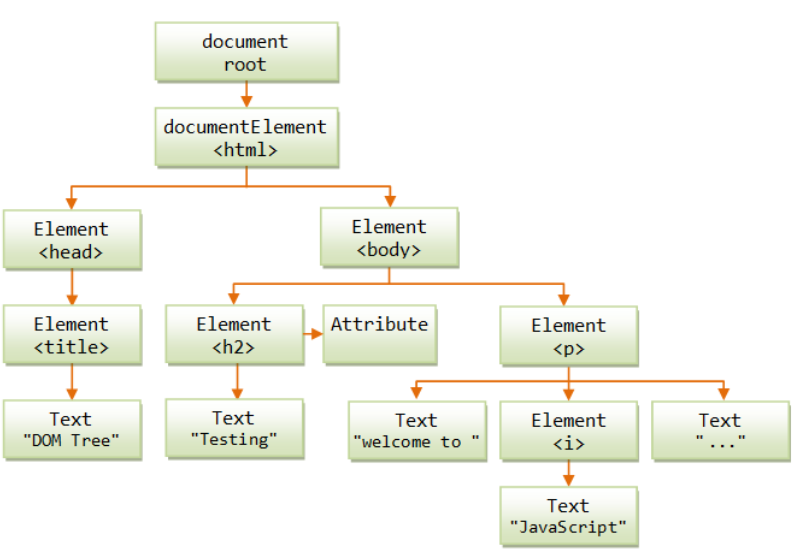

### 우리가 관심있는 것은 내용이 들어있는 body

- < > 이거는 태그
- 정규식 쓸 때 <는 앞에 at 붙여서 사용했다
- 둘이 같다

# BeautifulSoup

- string, byte의 형태가 들어오면 얘들을 바탕으로 돔트리 구성해주고 빠르게 접근할 수 있는 방법을 제공
- HTML/XML Parser이기 때문에 HTML/XML문자열에서 원하는 태그정보를 뽑아줍니다.
- python library for pulling data out of HTML and XML files
- provide idiomatic ways of navigating, searching, and modifying DOM
- saves programmers hours and days

In [3]:
!pip install bs4

  Stored in directory: C:\Users\kgh67\AppData\Local\pip\Cache\wheels\a0\b0\b2\4f80b9456b87abedbc0bf2d52235414c3467d8889be38dd472
Successfully built bs4


In [4]:
from bs4 import BeautifulSoup

1. lmxl
    - 어떤 parser 쓰느냐에 따라 속도 달라진다
    - lxml이 속도가 가장 빠르다 


2. lmxl.parser
    - 우리나라에서는 오류가 발생할 수도 있다
    - 이럴 때는 dom의 파서를 바꿔준다 -> 'html.parser'
    - 속도 준수
    
    
3. 정규식
    - 다 안될 경우 정규식 사용. 가장 확실한 방법

### html 문제
- every open tag must explicity be closed
- empty elements in XML are written closed
- child markup must nest completely within parent markup

In [5]:
BeautifulSoup()

In [15]:
html = """
<html>
 <head></head>
 <body> 
    <div>
         <p>
	<a>go to page</a>
         </p>
    </div>
  </body>
  """

In [16]:
dom = BeautifulSoup(html, 'lxml')

In [18]:
dom.html.body.div.p.a

<a>go to page</a>

In [19]:
dom.a

<a>go to page</a>

In [20]:
# 관계가 설정된 것일 뿐 각자 독립적이다

In [23]:
html1 = """
<html>
 <head></head>
 <body> 
    <div>
         <p>
	<a>go to page</a>
    <a>hungry</a>
         </p>
    </div>
  </body>
  """

In [24]:
dom1 = BeautifulSoup(html1, 'lxml')

In [31]:
dom1.a

<a>go to page</a>

In [32]:
# 두 번째 값을 얻고 싶다면 id와 class가 팔요하다

In [121]:
html2 = """
<html>
 <head></head>
 <body> 
    <div id = "result">
         <p class = "row">
	<a class = "red">go to page</a>
    <a class = "blue">hungry</a>
         </p>
    </div>
  </body>
  """


In [122]:
dom2 = BeautifulSoup(html2, 'lxml')

In [123]:
dom2.a

<a class="red">go to page</a>

In [124]:
dom2.p.children

In [125]:
for i in dom2:
    print(i)

<html>
<head></head>
<body>
<div id="result">
<p class="row">
<a class="red">go to page</a>
<a class="blue">hungry</a>
</p>
</div>
</body>
</html>


In [126]:
# html 파싱 시 중요할 때, 하나가 특성이 안 정해지면, 항상 부모로 올라가야
# body까지 올라가야 하는 경우에는 어떻게 해야 하나

In [127]:
dom2.div["id"]

'result'

In [128]:
type(dom2.div["id"])

str

In [129]:
type(dom2.a["class"])

list

In [130]:
dom2.a["class"]

['red']

In [131]:
for _ in dom.p.children:
    print(type(_),_)
# 앞에 껀 string, 뒤에꺼는 element
# 우리가 띄어쓰기 막 하고 그런 오류

<class 'bs4.element.NavigableString'> 

<class 'bs4.element.Tag'> <a>go to page</a>
<class 'bs4.element.NavigableString'> 



In [267]:
dom2.div.attrs
for _ in [x for x in dom.p.children]:
    print(type(_),_)

<class 'bs4.element.NavigableString'> 
We haven't figured out how to make online shopping carts yet, but you can send us a check to:
<class 'bs4.element.Tag'> <br/>
<class 'bs4.element.NavigableString'> 
123 Main St.
<class 'bs4.element.Tag'> <br/>
<class 'bs4.element.NavigableString'> 
Abuja, Nigeria
We will then send your totally amazing gift, pronto! Please include an extra $5.00 for gift wrapping.


In [269]:
[x for x in dom2.p.children][1].attrs

{'class': ['red']}

## find / find_all

- find는 하나만 찾아주고, find_all은 모두 찾아준다
        - find     (name, attrs, recursive, string, **kwargs)
        - find_all (name, attrs, recursive, string, limit, **kwargs)

1. 태그 이름
2. attribute
3. 본문 내용에 있는 텍스트를 가지고 찾는 방법

In [97]:
dom2.find_all('a')

[<a class="red">go to page</a>, <a class="blue">hungry</a>]

In [101]:
dom2.find_all('a','blue')

[<a class="blue">hungry</a>]

In [102]:
dom2.find_all('',attrs={'class':'red'})

[<a class="red">go to page</a>]

In [103]:
dom2.find_all('',attrs={'class':'blue'})

[<a class="blue">hungry</a>]

In [104]:
dom2.find_all('div',{'id':'result'})

[<div id="result">
 <p class="row">
 <a class="red">go to page</a>
 <a class="blue">hungry</a>
 </p>
 </div>]

In [107]:
dom2.find_all('a',limit=1)

[<a class="red">go to page</a>]

In [108]:
dom2.find_all('a',limit=2)

[<a class="red">go to page</a>, <a class="blue">hungry</a>]

In [137]:
# recursive = false : 더 이상 진행 x. 자식 요소만 찾겠다
dom2.find_all('a', recursive=False)

[]

- find_parent / find_parents
- find_next_sibling, find_previous_sibiling, find_next_siblings, find_previous_siblings

In [155]:
html = """
<html>
 <head></head>
 <body> 
    <div id = "result">
         <p class = "row">
	<a class = "red">
    <a></a>
   
    </a>
    <a class = "blue">go to page 2</a>
         </p>
    </div>
  </body>
  """

In [156]:
dom = BeautifulSoup(html, 'lxml')

In [157]:
len(dom.find_all('a'))

3

In [164]:
dom.p.a.find_all("a",recursive=False)

[]

In [165]:
[_.find_parent().name for _ in dom.find_all("a")]

['p', 'p', 'p']

In [166]:
hungry = """
<html>
 <head></head>
 <body> 
    <div id = "result">
         <p class = "row">
	<a class = "red">123</a>
    <a class = "blue">go to page 2</a>
    <div><a></a></div>     
         </p>
    </div>
  </body>
  """

In [167]:
dom = BeautifulSoup(hungry, 'lxml')

In [173]:
print(dom.prettify())

<html>
 <head>
 </head>
 <body>
  <div id="result">
   <p class="row">
    <a class="red">
     123
    </a>
    <a class="blue">
     go to page 2
    </a>
   </p>
   <div>
    <a>
    </a>
   </div>
  </div>
 </body>
</html>


In [175]:
dom.p.find_all("a",recursive=False)

[<a class="red">123</a>, <a class="blue">go to page 2</a>]

In [169]:
[_.find_parent().name for _ in dom.find_all("a")]

['p', 'p', 'div']

In [174]:
len(dom.p.find_all("a",recursive=False))

2

In [171]:
len(dom.find_all('a'))

3

In [176]:
hungry = """
<html>
 <head></head>
 <body> 
    <div id = "result">
         <p class = "row">
	<a class = "red">123</a>
    <a class = "blue">go to page 2</a>
    <div><a></a></div>     
         </p>
    </div>
  </body>
  """

In [177]:
dom = BeautifulSoup(hungry, 'html.parser')

In [179]:
len(dom.p.find_all("a"))

3

In [181]:
len(dom.p.find_all("a",recursive=False))

2

- lxml에서 안되면 html.parser

In [182]:
dom.div.a

<a class="red">123</a>

In [183]:
dom.p.div.a

<a></a>

In [196]:
dom.p.div.a.parent.name

'div'

In [200]:
dom.p.div.a.find_parent().name

'div'

In [201]:
html = """
<html>
 <head></head>
 <body> 
    <div id = "result">
         <p class = "row">
	<a class = "red">123</a>
    <a class = "blue">go to page 2</a>
    <div><a></a></div>
    <a class = "blue">go to page 2</a>
         </p>
    </div>
  </body>
  """

In [202]:
dom = BeautifulSoup(html, 'html.parser')

In [215]:
dom.p.div.a.find_parent().find_previous_sibling()

<a class="blue">go to page 2</a>

- 정보를 단순히 열람 : get
- 정보를 밀어넣는다(로그인 정보 등) : post

In [391]:
import urllib
import json
import requests


In [402]:
def download(method,url,param=None,data=None,timeout=1,maxretries=3):#원래 header도 있어야된다. 위에 정의한거 쓸꺼야
  
    try:
        resp=requests.request(method,url,params=param,data=data,headers=headers)
        
        resp.raise_for_status()#강제로 에러를 내는 코드
    except requests.exceptions.HTTPError as e:
        if 500<= e.response.status_code<600 and maxretries>0:
            time.sleep(timeout)
            print("재시도")
            resp=download(method,url,param,data,timeout,maxretries-1)
        else:
            print(e.response.status_code)
            print(e.response.reason)
    return resp
headers = None

In [403]:
html = download("get", "http://pythonscraping.com/pages/page3.html")

In [404]:
headers = None

In [394]:
html = html.text

In [244]:
dom = BeautifulSoup(html,'lxml')

In [245]:
dom.find_all()

[<html>
 <head>
 <style>
 img{
 	width:75px;
 }
 table{
 	width:50%;
 }
 td{
 	margin:10px;
 	padding:10px;
 }
 .wrapper{
 	width:800px;
 }
 .excitingNote{
 	font-style:italic;
 	font-weight:bold;
 }
 </style>
 </head>
 <body>
 <div id="wrapper">
 <img src="../img/gifts/logo.jpg" style="float:left;"/>
 <h1>Totally Normal Gifts</h1>
 <div id="content">Here is a collection of totally normal, totally reasonable gifts that your friends are sure to love! Our collection is
 hand-curated by well-paid, free-range Tibetan monks.<p>
 We haven't figured out how to make online shopping carts yet, but you can send us a check to:<br/>
 123 Main St.<br/>
 Abuja, Nigeria
 We will then send your totally amazing gift, pronto! Please include an extra $5.00 for gift wrapping.</p></div>
 <table id="giftList">
 <tr><th>
 Item Title
 </th><th>
 Description
 </th><th>
 Cost
 </th><th>
 Image
 </th></tr>
 <tr class="gift" id="gift1"><td>
 Vegetable Basket
 </td><td>
 This vegetable basket is the perfect gift f

In [246]:
dom.find("div",{"id":"footer"})

<div id="footer">
© Totally Normal Gifts, Inc. <br/>
+234 (617) 863-0736
</div>

In [247]:
footer =dom.find("div",{"id":"footer"})

In [248]:
[_.name for _ in footer.find_parents()]

['div', 'body', 'html', '[document]']

In [282]:
dom.body.div.div.find_previous_sibling

<bound method PageElement.find_previous_sibling of <div id="content">Here is a collection of totally normal, totally reasonable gifts that your friends are sure to love! Our collection is
hand-curated by well-paid, free-range Tibetan monks.<p>
We haven't figured out how to make online shopping carts yet, but you can send us a check to:<br/>
123 Main St.<br/>
Abuja, Nigeria
We will then send your totally amazing gift, pronto! Please include an extra $5.00 for gift wrapping.</p></div>>

In [273]:
dom.body.div.p.find_previous_sibling

<bound method PageElement.find_previous_sibling of <p>
We haven't figured out how to make online shopping carts yet, but you can send us a check to:<br/>
123 Main St.<br/>
Abuja, Nigeria
We will then send your totally amazing gift, pronto! Please include an extra $5.00 for gift wrapping.</p>>

In [285]:
[_.name for _ in footer.find_parent().find_all(recursive=False)]

['img', 'h1', 'div', 'table', 'div']

In [286]:
footer.find_parent().find_all(recursive=False)

[<img src="../img/gifts/logo.jpg" style="float:left;"/>,
 <h1>Totally Normal Gifts</h1>,
 <div id="content">Here is a collection of totally normal, totally reasonable gifts that your friends are sure to love! Our collection is
 hand-curated by well-paid, free-range Tibetan monks.<p>
 We haven't figured out how to make online shopping carts yet, but you can send us a check to:<br/>
 123 Main St.<br/>
 Abuja, Nigeria
 We will then send your totally amazing gift, pronto! Please include an extra $5.00 for gift wrapping.</p></div>,
 <table id="giftList">
 <tr><th>
 Item Title
 </th><th>
 Description
 </th><th>
 Cost
 </th><th>
 Image
 </th></tr>
 <tr class="gift" id="gift1"><td>
 Vegetable Basket
 </td><td>
 This vegetable basket is the perfect gift for your health conscious (or overweight) friends!
 <span class="excitingNote">Now with super-colorful bell peppers!</span>
 </td><td>
 $15.00
 </td><td>
 <img src="../img/gifts/img1.jpg"/>
 </td></tr>
 <tr class="gift" id="gift2"><td>
 Russian 

In [305]:
footer.find_previous_sibling().find_all("tr")[1].find_all("td")[-1].find()

<img src="../img/gifts/img1.jpg"/>

In [328]:
footer.find_parent().find('tr',{"id":"gift4"}).img

<img src="../img/gifts/img4.jpg"/>

In [329]:
footer.find_parent().find('tr',{"id":"gift2"}).img

<img src="../img/gifts/img2.jpg"/>

In [340]:
x = len(footer.find_previous_sibling().find_all("img"))

In [343]:
y = "/img/gifts/img"+i+".jpg"
for i in x:
    url = "http://pythonscraping.com/pages/page3.html"
    url = requests.compat.urljoin(url, y)

TypeError: can only concatenate str (not "Tag") to str

In [405]:
html.url

'http://pythonscraping.com/pages/page3.html'

In [383]:
import requests

In [406]:
[requests.compat.urljoin(html.url, _.find_all("td")[-1].find()["src"]) 
 for _ in footer.find_previous_sibling().find_all("tr")[1:]]

['http://pythonscraping.com/img/gifts/img1.jpg',
 'http://pythonscraping.com/img/gifts/img2.jpg',
 'http://pythonscraping.com/img/gifts/img3.jpg',
 'http://pythonscraping.com/img/gifts/img4.jpg',
 'http://pythonscraping.com/img/gifts/img6.jpg']

In [433]:
# 총 6개가 있는데 제목을 빼고 가져오는 것이다o

In [408]:
imgList = [requests.compat.urljoin(html.url, _.find_all("td")[-1].find()["src"]) 
 for _ in footer.find_previous_sibling().find_all("tr")[1:]]

In [409]:
down = download("get", imgList[0])

In [418]:
down.headers

{'Date': 'Fri, 12 Jul 2019 05:57:05 GMT', 'Server': 'Apache', 'Last-Modified': 'Mon, 04 Aug 2014 00:49:04 GMT', 'ETag': '"412006a-148ea-4ffc31b072000"', 'Accept-Ranges': 'bytes', 'Content-Length': '84202', 'Cache-Control': 'max-age=1209600', 'Expires': 'Fri, 26 Jul 2019 05:57:05 GMT', 'Keep-Alive': 'timeout=5, max=100', 'Connection': 'Keep-Alive', 'Content-Type': 'image/jpeg'}

In [429]:
html.headers

{'Date': 'Fri, 12 Jul 2019 05:52:55 GMT', 'Server': 'Apache', 'Last-Modified': 'Sat, 09 Jun 2018 19:15:59 GMT', 'ETag': '"4121bca-965-56e3a58b5a0ca"', 'Accept-Ranges': 'bytes', 'Content-Length': '2405', 'Cache-Control': 'max-age=1209600', 'Expires': 'Fri, 26 Jul 2019 05:52:55 GMT', 'Keep-Alive': 'timeout=5, max=100', 'Connection': 'Keep-Alive', 'Content-Type': 'text/html'}

In [432]:
html.headers["Content-Type"].split('/')[0] == 'image'

False

In [410]:
down.headers["Content-Type"].split("/")[0] == 'image'

True

In [428]:
down.headers["Content-Type"].split("/")[0]

'image'

In [415]:
down.text

'����\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00��\x00<CREATOR: gd-jpeg v1.0 (using IJG JPEG v80), quality = 100\n��\x00C\x00\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01��\x00C\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01��\x00\x11\x08\x01,\x01,\x03\x01"\x00\x02\x11\x01\x03\x11\x01��\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b��\x00�\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142���\x08#B��\x15R��$3br�\t\n\x16\

In [434]:
down.content

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xfe\x00<CREATOR: gd-jpeg v1.0 (using IJG JPEG v80), quality = 100\n\xff\xdb\x00C\x00\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\xff\xdb\x00C\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\xff\xc0\x00\x11\x08\x01,\x01,\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\

In [419]:
requests.compat.urlparse(down.url)

ParseResult(scheme='http', netloc='pythonscraping.com', path='/img/gifts/img1.jpg', params='', query='', fragment='')

In [420]:
down.url.split("/")[-1].split(".")[0]

'img1'

In [425]:
filename = "{0}.{1}".format(down.url.split("/")[-1].split(".")[0],down.headers["Content-Type"].split("/")[1])

In [427]:
with open(filename, "wb") as fp:
    fp.write(down.content)

In [439]:
html = BeautifulSoup(html.text, 'lxml')
[_["src"] for _ in dom.table.find_all("img")]

['../img/gifts/img1.jpg',
 '../img/gifts/img2.jpg',
 '../img/gifts/img3.jpg',
 '../img/gifts/img4.jpg',
 '../img/gifts/img6.jpg']

In [444]:
re.findall('<img src="(.+?)">',html.text) 
# 이렇게 하면 된다

[]